<a href="https://colab.research.google.com/github/harshithap99/open-lab/blob/master/ricedis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer-learning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

Using TensorFlow backend.


In [0]:
img=glob.glob(("/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/*"))
for i in img:
    print(i)

/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast
/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/Hispa
/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot
/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/Healthy


In [0]:

from sklearn.datasets import load_files
import numpy as np

train_dir = '/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train'
test_dir = '/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)

x_test, y_test,_ = load_dataset(test_dir)

print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

  

Loading complete!
Training set size :  1600
Testing set size :  496


In [0]:
no_of_classes = len(np.unique(y_train))
no_of_classes

4

In [0]:
print(y_train[0:10])

[2 0 3 2 2 1 2 1 3 0]


In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] # Note that only one element has value 1(corresponding to its label) and others are 0.
#one hot encoding for labels

array([0., 0., 1., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import  train_test_split
X_train,x_val,Y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=42)
print(X_train[0])
print(Y_train[0])
print(x_val[0])
print(y_val[0])
print(len(X_train))
print(len(x_val))
#y are labels
#x are images

/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast/IMG_3055.jpg
[0. 0. 0. 1.]
/content/drive/My Drive/Colab Notebooks/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot/IMG_20190420_194507.jpg
[1. 0. 0. 0.]
1200
400


In [0]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import cv2
default_image_size=tuple((256,256))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Validation set shape : ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',X_train[0].shape)

Training set shape :  (1200, 256, 256, 3)
Validation set shape :  (400, 256, 256, 3)
Test set shape :  (496, 256, 256, 3)
1st training image shape  (256, 256, 3)


In [0]:
print('1st training image as array',X_train[0]) 

1st training image as array [[[232. 230. 242.]
  [240. 236. 248.]
  [224. 222. 234.]
  ...
  [224. 222. 234.]
  [221. 219. 231.]
  [230. 228. 240.]]

 [[230. 228. 240.]
  [233. 231. 243.]
  [227. 225. 237.]
  ...
  [226. 224. 236.]
  [229. 227. 239.]
  [229. 227. 239.]]

 [[230. 228. 240.]
  [229. 227. 239.]
  [227. 225. 237.]
  ...
  [226. 224. 236.]
  [230. 230. 230.]
  [230. 230. 230.]]

 ...

 [[254. 254. 255.]
  [239. 241. 247.]
  [236. 240. 251.]
  ...
  [240. 239. 255.]
  [247. 246. 255.]
  [243. 244. 254.]]

 [[229. 231. 242.]
  [225. 228. 239.]
  [240. 243. 254.]
  ...
  [241. 241. 255.]
  [245. 249. 254.]
  [245. 248. 255.]]

 [[228. 230. 241.]
  [234. 238. 249.]
  [237. 240. 251.]
  ...
  [243. 243. 254.]
  [245. 248. 255.]
  [243. 246. 255.]]]


In [0]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[0.9098039 , 0.9019608 , 0.9490196 ],
        [0.9411765 , 0.9254902 , 0.972549  ],
        [0.8784314 , 0.87058824, 0.91764706],
        ...,
        [0.8784314 , 0.87058824, 0.91764706],
        [0.8666667 , 0.85882354, 0.90588236],
        [0.9019608 , 0.89411765, 0.9411765 ]],

       [[0.9019608 , 0.89411765, 0.9411765 ],
        [0.9137255 , 0.90588236, 0.9529412 ],
        [0.8901961 , 0.88235295, 0.92941177],
        ...,
        [0.8862745 , 0.8784314 , 0.9254902 ],
        [0.8980392 , 0.8901961 , 0.9372549 ],
        [0.8980392 , 0.8901961 , 0.9372549 ]],

       [[0.9019608 , 0.89411765, 0.9411765 ],
        [0.8980392 , 0.8901961 , 0.9372549 ],
        [0.8901961 , 0.88235295, 0.92941177],
        ...,
        [0.8862745 , 0.8784314 , 0.9254902 ],
        [0.9019608 , 0.9019608 , 0.9019608 ],
        [0.9019608 , 0.9019608 , 0.9019608 ]],

       ...,

       [[0.99607843, 0.99607843, 1.        ],
        [0.9372549 , 0.94509804, 0.96862745],
        [0.9254902 , 0

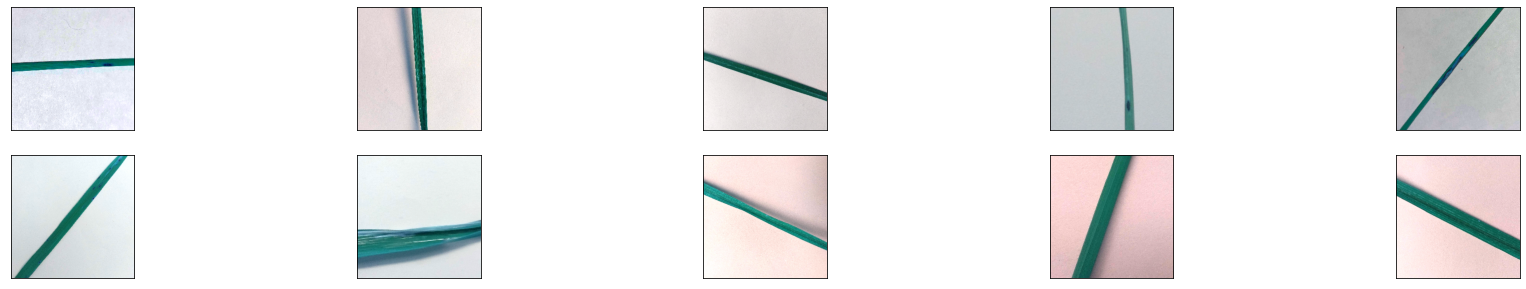

In [0]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [0]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
aug1=ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


--2020-05-14 19:14:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  92.5MB/s    in 0.9s    

2020-05-14 19:14:02 (92.5 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 14, 14, 768)


In [0]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (4, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [0]:

from keras.optimizers import Adam

from tensorflow.keras.optimizers import RMSprop
EPOCHS = 30
INIT_LR = 1e-3
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [0]:

from keras.callbacks import ModelCheckpoint
batch_size = 32

#checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_rice.hdf5', verbose = 1, save_best_only = True)

history = model.fit_generator(
    aug.flow(X_train,Y_train,batch_size=20),
    #batch_size=32,
        steps_per_epoch=60,
        epochs=30,
        validation_data=aug1.flow(x_val, y_val,batch_size=10),
        validation_steps=40,
        #callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30
60/60 - 252s - loss: 1.2617 - accuracy: 0.4217 - val_loss: 1.1578 - val_accuracy: 0.4550
Epoch 2/30
60/60 - 252s - loss: 1.2193 - accuracy: 0.4317 - val_loss: 1.2741 - val_accuracy: 0.4425
Epoch 3/30
60/60 - 255s - loss: 1.2004 - accuracy: 0.4483 - val_loss: 1.1364 - val_accuracy: 0.4950
Epoch 4/30
60/60 - 252s - loss: 1.1920 - accuracy: 0.4492 - val_loss: 1.1902 - val_accuracy: 0.4700
Epoch 5/30
60/60 - 253s - loss: 1.1434 - accuracy: 0.4800 - val_loss: 1.1367 - val_accuracy: 0.4675
Epoch 6/30
60/60 - 253s - loss: 1.1310 - accuracy: 0.4775 - val_loss: 1.1969 - val_accuracy: 0.4575
Epoch 7/30
60/60 - 253s - loss: 1.1072 - accuracy: 0.4992 - val_loss: 1.1241 - val_accuracy: 0.4875
Epoch 8/30
60/60 - 251s - loss: 1.1029 - accuracy: 0.5133 - val_loss: 1.1303 - val_accuracy: 0.4625
Epoch 9/30
60/60 - 250s - loss: 1.0834 - accuracy: 0.5233 - val_loss: 1.0537 - val_accuracy: 0.5100
Epoch 10/30
60/60 - 251s - loss: 1.0723 - accuracy: 0.5225 - val_loss: 1.0522 - val_accuracy: 0.5200

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=128,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!

In [0]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [0]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

In [0]:
#confusion matrix
y_pred2=model.predict(x_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()